### Linear Regression

In [121]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [122]:
df = pd.read_csv("Housing.csv")
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [123]:
df.shape

(545, 13)

In [124]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [126]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [127]:
df.isna().sum()
#No missing values in the given dataset, So that's clean dataset.

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [128]:
df.duplicated().sum()

np.int64(0)

In [129]:
data =pd.DataFrame(df)
data

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


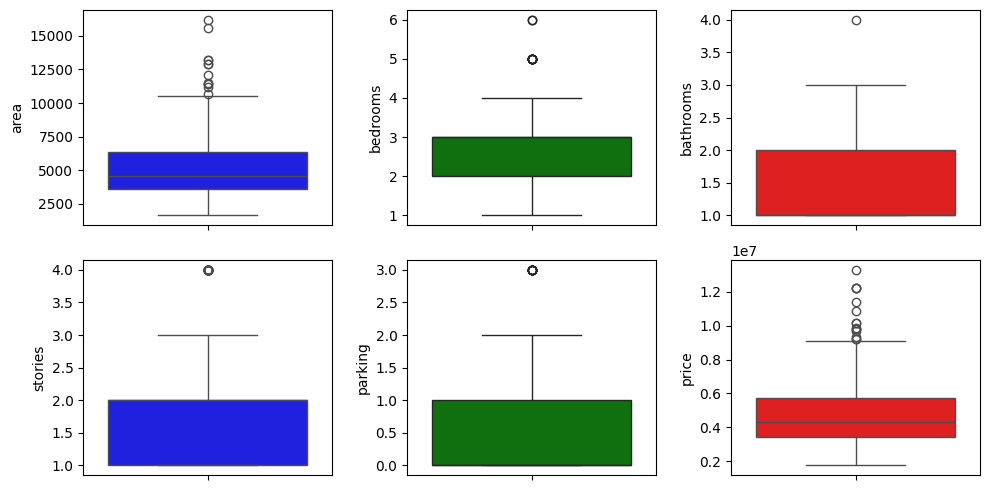

In [130]:
# Checking for outliers

fig, axs = plt.subplots(2,3, figsize=(10,5))
plt1 = sns.boxplot(data['area'], ax = axs[0,0], color='blue')
plt2 = sns.boxplot(data['bedrooms'], ax = axs[0,1], color='green')
plt3 = sns.boxplot(data['bathrooms'], ax = axs[0,2], color='red')
plt4 = sns.boxplot(data['stories'], ax = axs[1,0], color='blue')
plt5 = sns.boxplot(data['parking'], ax = axs[1,1], color='green')
plt6 = sns.boxplot(data['price'], ax = axs[1,2], color='red')

plt.tight_layout()


In [131]:
for column in data:
    print(data[column].value_counts(ascending = False), end = "\n\n\n")

price
4200000    17
3500000    17
4900000    12
5250000     9
5600000     9
           ..
2135000     1
1960000     1
1855000     1
1820000     1
1767150     1
Name: count, Length: 219, dtype: int64


area
6000    24
3000    14
4500    13
4000    11
6600     9
        ..
3360     1
1700     1
3649     1
2990     1
3620     1
Name: count, Length: 284, dtype: int64


bedrooms
3    300
2    136
4     95
5     10
6      2
1      2
Name: count, dtype: int64


bathrooms
1    401
2    133
3     10
4      1
Name: count, dtype: int64


stories
2    238
1    227
4     41
3     39
Name: count, dtype: int64


mainroad
yes    468
no      77
Name: count, dtype: int64


guestroom
no     448
yes     97
Name: count, dtype: int64


basement
no     354
yes    191
Name: count, dtype: int64


hotwaterheating
no     520
yes     25
Name: count, dtype: int64


airconditioning
no     373
yes    172
Name: count, dtype: int64


parking
0    299
1    126
2    108
3     12
Name: count, dtype: int64


prefarea
no  

In [132]:
# Create the new dataframe, without the 'area' column.
house_new = data[['price', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea', 'furnishingstatus']]

# Display the new dataframe's information.
house_new.info

<bound method DataFrame.info of         price  bedrooms  bathrooms  ...  parking prefarea furnishingstatus
0    13300000         4          2  ...        2      yes        furnished
1    12250000         4          4  ...        3       no        furnished
2    12250000         3          2  ...        2      yes   semi-furnished
3    12215000         4          2  ...        3      yes        furnished
4    11410000         4          1  ...        2       no        furnished
..        ...       ...        ...  ...      ...      ...              ...
540   1820000         2          1  ...        2       no      unfurnished
541   1767150         3          1  ...        0       no   semi-furnished
542   1750000         2          1  ...        0       no      unfurnished
543   1750000         3          1  ...        0       no        furnished
544   1750000         3          1  ...        0       no      unfurnished

[545 rows x 12 columns]>

In [133]:
# We will now create dummy variables for all of the categorical data.
house_new = pd.get_dummies(house_new, drop_first = True)

# Redisplay the info again.
house_new.info()
house_new.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype
---  ------                           --------------  -----
 0   price                            545 non-null    int64
 1   bedrooms                         545 non-null    int64
 2   bathrooms                        545 non-null    int64
 3   stories                          545 non-null    int64
 4   parking                          545 non-null    int64
 5   mainroad_yes                     545 non-null    bool 
 6   guestroom_yes                    545 non-null    bool 
 7   basement_yes                     545 non-null    bool 
 8   hotwaterheating_yes              545 non-null    bool 
 9   airconditioning_yes              545 non-null    bool 
 10  prefarea_yes                     545 non-null    bool 
 11  furnishingstatus_semi-furnished  545 non-null    bool 
 12  furnishingstatus_unfurnished     545 non-null    b

(545, 13)

In [134]:
house_new

,price,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,4,2,3,2,True,False,False,False,True,True,False,False
1,12250000,4,4,4,3,True,False,False,False,True,False,False,False
2,12250000,3,2,2,2,True,False,True,False,False,True,True,False
3,12215000,4,2,2,3,True,False,True,False,True,True,False,False
4,11410000,4,1,2,2,True,True,True,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,2,1,1,2,True,False,True,False,False,False,False,True
541,1767150,3,1,1,0,False,False,False,False,False,False,True,False
542,1750000,2,1,1,0,True,False,False,False,False,False,False,True
543,1750000,3,1,1,0,False,False,False,False,False,False,False,False


In [135]:
from sklearn.preprocessing import LabelEncoder
le =LabelEncoder()

categorical_cols = house_new.select_dtypes(include=['bool']).columns.tolist()

for col in categorical_cols:
    house_new[col] = le.fit_transform(house_new[col])

house_new


,price,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,4,2,3,2,1,0,0,0,1,1,0,0
1,12250000,4,4,4,3,1,0,0,0,1,0,0,0
2,12250000,3,2,2,2,1,0,1,0,0,1,1,0
3,12215000,4,2,2,3,1,0,1,0,1,1,0,0
4,11410000,4,1,2,2,1,1,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,2,1,1,2,1,0,1,0,0,0,0,1
541,1767150,3,1,1,0,0,0,0,0,0,0,1,0
542,1750000,2,1,1,0,1,0,0,0,0,0,0,1
543,1750000,3,1,1,0,0,0,0,0,0,0,0,0


In [136]:
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

X = house_new.drop(['price'], axis=1)
Y = house_new['price']

X_train, X_valid, Y_train, Y_valid = train_test_split(X, Y, train_size=0.7, test_size=0.3, random_state=42)

In [137]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_percentage_error

model_LR = LinearRegression()
model_LR.fit(X_train, Y_train)
Y_pred = model_LR.predict(X_valid)

print(mean_absolute_percentage_error(Y_valid, Y_pred))

0.2259407907334795


In [138]:
print(len(Y_valid), len(Y_pred))
Y_pred = Y_pred.flatten()


164 164


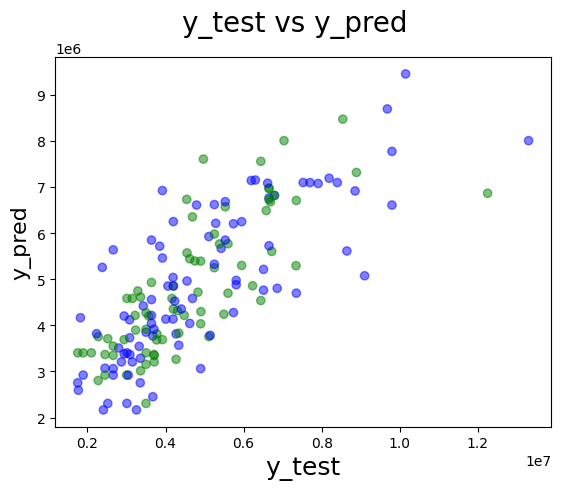

In [139]:
fig = plt.figure()
cols = np.random.choice(['blue', 'green'], size=len(Y_valid))
plt.scatter(Y_valid, Y_pred, alpha=.5, c=cols)

# Labeling the plot.
fig.suptitle('y_test vs y_pred', fontsize = 20)
plt.xlabel('y_test', fontsize = 18)
plt.ylabel('y_pred', fontsize = 16)
plt.show()